<a href="https://colab.research.google.com/github/Arjunros/Simple_Machine_Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [ ]:
print(transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)


In [ ]:
train_data = torchvision.datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data = torchvision.datasets.MNIST(root='data',train=False,download=True,transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.97MB/s]


In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

In [ ]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)   # Input layer (784 -> 128)
        self.fc2 = nn.Linear(128, 64)      # Hidden layer (128 -> 64)
        self.fc3 = nn.Linear(64, 10)       # Output layer (64 -> 10)
    def forward(self, x):
        x = x.view(-1, 28*28)            # Flatten image (batch, 1, 28, 28) -> (batch, 784)
        x = torch.relu(self.fc1(x))      # ReLU activation after first layer
        x = torch.relu(self.fc2(x))      # ReLU activation after second layer
        return self.fc3(x)


In [ ]:
model = DigitClassifier()                             # Create the model
loss_fn = nn.CrossEntropyLoss()                       # Loss for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer updates weights


In [ ]:
for epoch in range(5):
    total_loss = 0
    for images, labels in train_loader:   # Loop over training batches
        optimizer.zero_grad()             # Reset gradients
        outputs = model(images)           # Forward pass
        loss = loss_fn(outputs, labels)   # Compute loss
        loss.backward()                   # Backpropagate
        optimizer.step()                  # Update weights
        total_loss += loss.item()         # Track loss value
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 381.3840
Epoch 2, Loss: 183.3479
Epoch 3, Loss: 132.4855
Epoch 4, Loss: 105.7717
Epoch 5, Loss: 90.1285


In [ ]:
correct = 0
total = 0
with torch.no_grad():                             # Disable gradient tracking (faster, saves memory)
    for images, labels in test_loader:
        outputs = model(images)                   # Forward pass
        _, predicted = torch.max(outputs, 1)      # Get predicted class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.08%


In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)
_, preds = torch.max(output, 1)


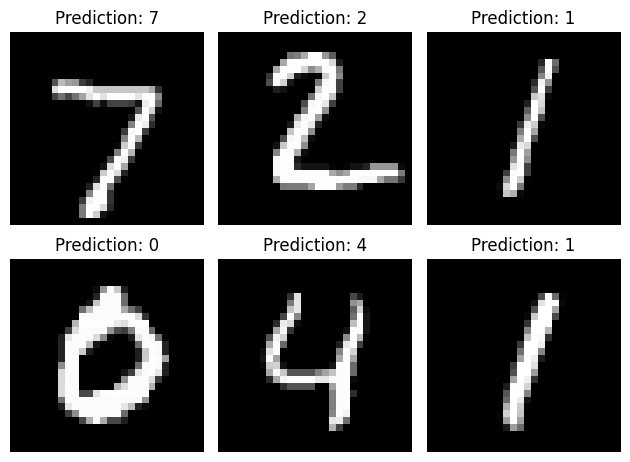

In [ ]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Prediction: {preds[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()
